In [150]:
pip install PyWavelets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('./test_images/yogi.jpg')
img.shape

(720, 1280, 3)

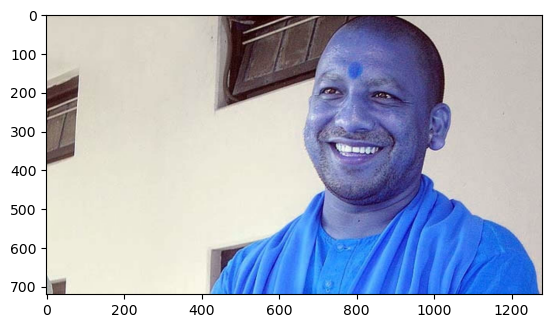

In [4]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [7]:
gray

array([[193, 193, 193, ..., 184, 184, 183],
       [194, 194, 194, ..., 184, 184, 183],
       [196, 196, 196, ..., 184, 184, 183],
       ...,
       [182, 182, 182, ..., 202, 195, 198],
       [181, 181, 180, ..., 204, 197, 200],
       [180, 180, 179, ..., 206, 198, 202]], dtype=uint8)

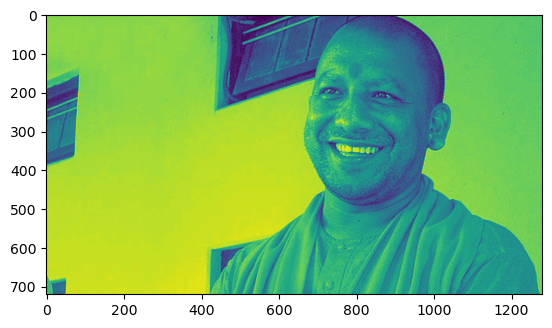

In [8]:
plt.imshow(gray)


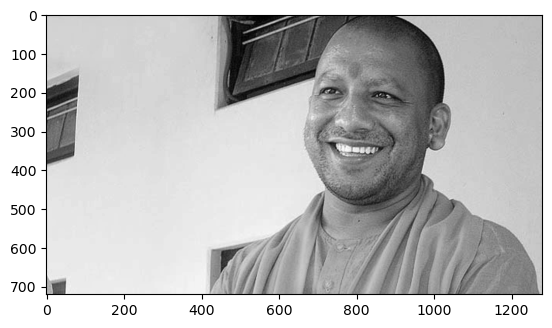

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3, 5)
faces

array([[654,  67, 355, 355]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(654, 67, 355, 355)

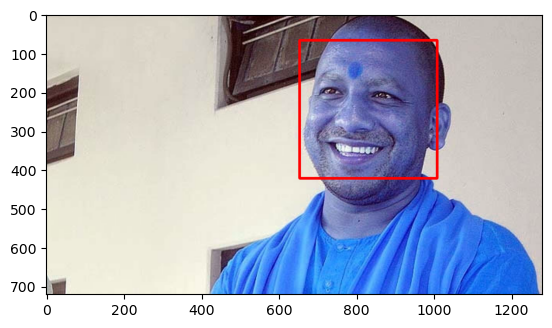

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
plt.imshow(face_img)

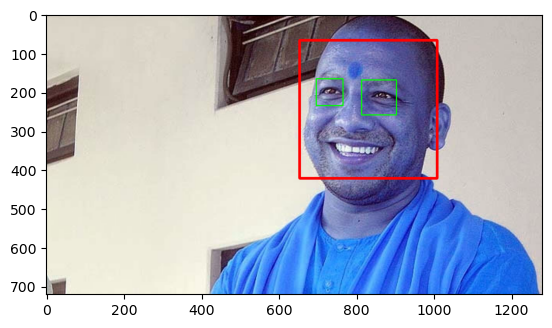

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

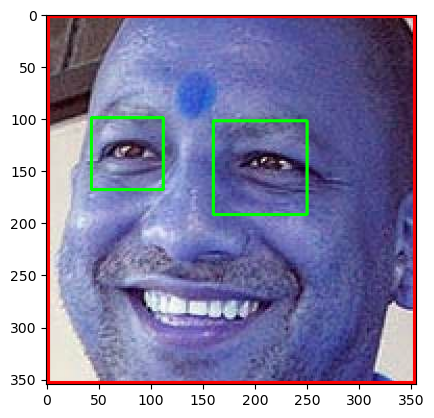

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

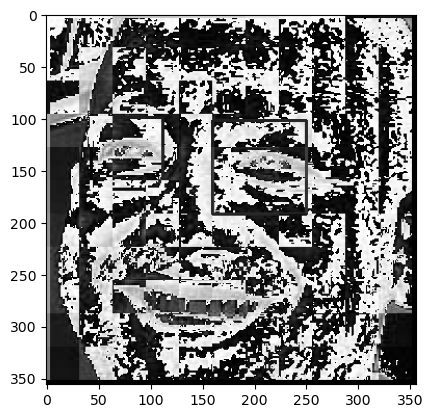

In [15]:
import numpy as np
. 

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
im_har = w2d(roi_color,'db1',5)
plt.imshow(im_har, cmap='gray')

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

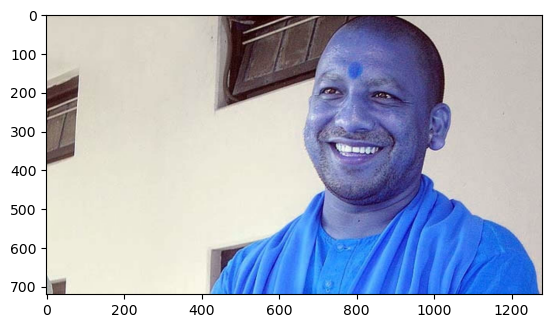

In [17]:
original_image = cv2.imread('./test_images/yogi.jpg')
plt.imshow(original_image)

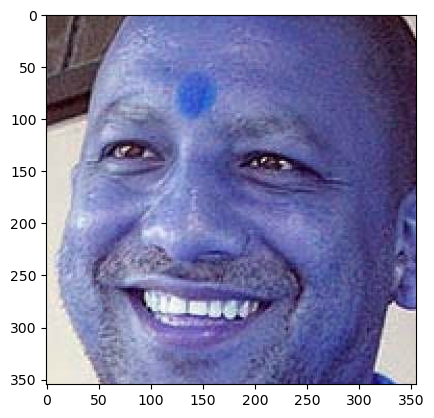

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/yogi.jpg')
plt.imshow(cropped_image)

In [27]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_gray.astype('uint8')  # Ensure correct data type
    
    return None  # Return None if no eyes are found

# Example usage
image_path = './test_images/narendra_modi.jpg'
cropped_image = get_cropped_image_if_2_eyes(image_path)

import matplotlib.pyplot as plt

# Check if the image is not None before attempting to display
if cropped_image is not None:
    # Display the cropped image using a grayscale colormap
    plt.imshow(cropped_image, cmap='gray')
    plt.show()
else:
    print("No eyes found in the image.")

No eyes found in the image.


In [28]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./dataset/adityanath yogi',
 './dataset/amit shah',
 './dataset/arvind kejriwal',
 './dataset/Bhagwant Singh Mann',
 './dataset/Bhajan Lal Sharma',
 './dataset/Bhupendrabhai Patel',
 './dataset/Conrad Sangma',
 './dataset/cropped',
 './dataset/Eknath Shinde',
 './dataset/Hemant Soren',
 './dataset/Himanta Biswa Sarma',
 './dataset/Lalduhoma',
 './dataset/M. K. Stalin',
 './dataset/Mamata Banerjee',
 './dataset/Manik Saha',
 './dataset/manohar Lal Khattar',
 './dataset/Mohan Yadav',
 './dataset/N. Biren Singh',
 './dataset/N. Rangaswamy',
 './dataset/narendra modi',
 './dataset/Naveen Patnaik',
 './dataset/Neiphiu Rio',
 './dataset/Nitish Kumar',
 './dataset/Pema Khandu',
 './dataset/Pinarayi Vijayan',
 './dataset/Pramod Sawant',
 './dataset/Prem Singh Tamang',
 './dataset/Pushkar Singh Dhami',
 './dataset/Revanth Reddy',
 './dataset/Siddaramaiah',
 './dataset/sukhvinder Singh Sukhu',
 './dataset/vishnu deo sai',
 './dataset/Y. S. Jagan Mohan Reddy']

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) 

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

adityanath yogi
Generating cropped images in folder:  ./dataset/cropped/adityanath yogi
Error: Unable to load image at ./dataset/adityanath yogi\fbimg.php_is_home=0&is_front_page=0&object_type=post&post_id=179981&object_id=179981&img=https_253A_252F_252Fthenewsmill.com_252Fwp-content_252Fuploads_252F2024_252F01_252Fwomen-secu.jpg
amit shah
Generating cropped images in folder:  ./dataset/cropped/amit shah
Error: Unable to load image at ./dataset/amit shah\521893-516680-file-amit-shah-2.gif
arvind kejriwal
Generating cropped images in folder:  ./dataset/cropped/arvind kejriwal
Bhagwant Singh Mann
Generating cropped images in folder:  ./dataset/cropped/Bhagwant Singh Mann
Error: Unable to load image at ./dataset/Bhagwant Singh Mann\1653420016_25mann_3c.gif
Error: Unable to load image at ./dataset/Bhagwant Singh Mann\ਗੈਰ-ਕਾਨੂੰਨੀ-ਰੇਤ-ਮਾਇਨਿੰਗ-ਦੇ-ਮੁੱਦੇ-ਤੇ-ਅੱਜ-ਪੰਜਾਬ-ਦੇ-ਰਾਜਪਾਲ-ਨੂੰ-ਮਿਲਣਗੇ-ਰਾਘਵ-ਚੱਢਾ-18.jpg
Bhajan Lal Sharma
Generating cropped images in folder:  ./dataset/cropped/Bhajan Lal Sharma

# TRAINING And TESTING

In [16]:
# import os
# cropped_image_dirs= []
# for entry in os.scandir(path_to_cr_data):
#     if entry.is_dir():
#         cropped_image_dirs.append(entry.path)

In [17]:
# print(cropped_image_dirs)
# print(celebrity_file_names_dict)

[]


In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'adityanath yogi': ['./dataset/cropped/adityanath yogi\\adityanath yogi1.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi10.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi11.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi12.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi13.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi14.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi15.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi17.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi18.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi2.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi20.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi21.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi24.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi25.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi26.png',
  './dataset/cropped/adityanath yogi\\adityanath yogi

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'adityanath yogi': 0,
 'amit shah': 1,
 'arvind kejriwal': 2,
 'Bhagwant Singh Mann': 3,
 'Bhajan Lal Sharma': 4,
 'Bhupendrabhai Patel': 5,
 'Conrad Sangma': 6,
 'Eknath Shinde': 7,
 'Hemant Soren': 8,
 'Himanta Biswa Sarma': 9,
 'Lalduhoma': 10,
 'M. K. Stalin': 11,
 'Mamata Banerjee': 12,
 'Manik Saha': 13,
 'manohar Lal Khattar': 14,
 'Mohan Yadav': 15,
 'N. Biren Singh': 16,
 'N. Rangaswamy': 17,
 'narendra modi': 18,
 'Naveen Patnaik': 19,
 'Neiphiu Rio': 20,
 'Nitish Kumar': 21,
 'Pema Khandu': 22,
 'Pinarayi Vijayan': 23,
 'Pramod Sawant': 24,
 'Prem Singh Tamang': 25,
 'Pushkar Singh Dhami': 26,
 'Revanth Reddy': 27,
 'Siddaramaiah': 28,
 'sukhvinder Singh Sukhu': 29,
 'vishnu deo sai': 30,
 'Y. S. Jagan Mohan Reddy': 31}

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [38]:
len(X[0])


4096

In [39]:

32*32*3 + 32*32

4096

In [40]:
X[0]


array([[108],
       [108],
       [108],
       ...,
       [233],
       [251],
       [  8]], dtype=uint8)

In [41]:
y[0]


0

In [42]:

X = np.array(X).reshape(len(X),4096).astype(float)


In [43]:
X.shape

(1935, 4096)

In [44]:
X[0]

array([108., 108., 108., ..., 233., 251.,   8.])

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=43)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6643717728055077

In [57]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.45      0.86      0.59        22
           2       0.61      0.58      0.59        19
           3       1.00      1.00      1.00        11
           4       1.00      0.40      0.57         5
           5       0.79      0.79      0.79        19
           6       0.73      0.87      0.79        31
           7       1.00      0.75      0.86         8
           8       0.64      0.75      0.69        12
           9       0.38      0.68      0.49        22
          10       0.93      0.67      0.78        21
          11       0.77      0.80      0.79        30
          12       0.68      0.52      0.59        25
          13       1.00      0.50      0.67        16
          14       1.00      0.50      0.67         2
          15       0.86      0.46      0.60        13
          16       0.62      0.21      0.31        24
          17       1.00    

In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [61]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
     },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [62]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.710491,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.380372,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.627793,{'logisticregression__C': 1}


In [63]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(X_test,y_test)

0.7418244406196214

In [65]:
best_estimators['random_forest'].score(X_test,y_test)

0.3889845094664372

In [66]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6471600688468159

In [67]:
best_clf = best_estimators['svm']

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0, ...,  0,  0,  0],
       [ 0, 19,  0, ...,  0,  0,  0],
       [ 0,  1, 14, ...,  0,  0,  0],
       ...,
       [ 0,  1,  1, ..., 10,  0,  1],
       [ 0,  1,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0, 27]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

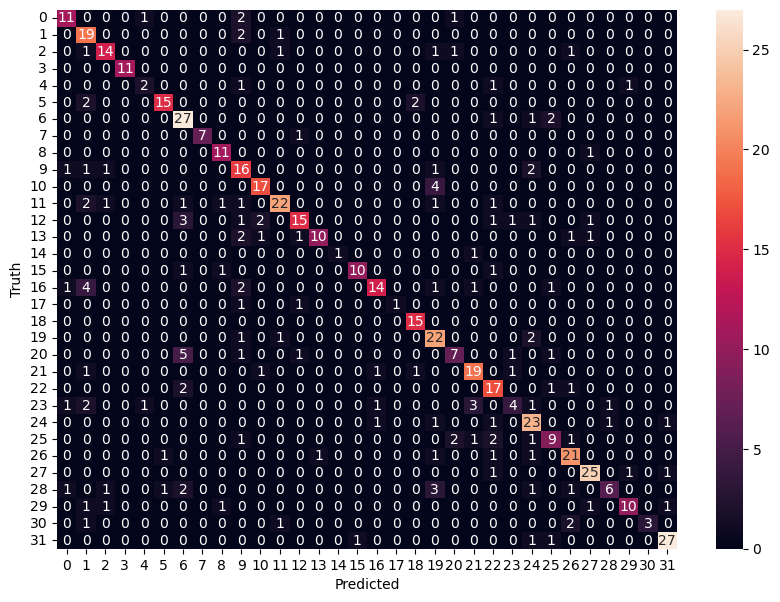

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
class_dict

{'adityanath yogi': 0,
 'amit shah': 1,
 'arvind kejriwal': 2,
 'Bhagwant Singh Mann': 3,
 'Bhajan Lal Sharma': 4,
 'Bhupendrabhai Patel': 5,
 'Conrad Sangma': 6,
 'Eknath Shinde': 7,
 'Hemant Soren': 8,
 'Himanta Biswa Sarma': 9,
 'Lalduhoma': 10,
 'M. K. Stalin': 11,
 'Mamata Banerjee': 12,
 'Manik Saha': 13,
 'manohar Lal Khattar': 14,
 'Mohan Yadav': 15,
 'N. Biren Singh': 16,
 'N. Rangaswamy': 17,
 'narendra modi': 18,
 'Naveen Patnaik': 19,
 'Neiphiu Rio': 20,
 'Nitish Kumar': 21,
 'Pema Khandu': 22,
 'Pinarayi Vijayan': 23,
 'Pramod Sawant': 24,
 'Prem Singh Tamang': 25,
 'Pushkar Singh Dhami': 26,
 'Revanth Reddy': 27,
 'Siddaramaiah': 28,
 'sukhvinder Singh Sukhu': 29,
 'vishnu deo sai': 30,
 'Y. S. Jagan Mohan Reddy': 31}

In [72]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [74]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))